<a href="https://colab.research.google.com/github/JulianotCosta/Dictionary_IA/blob/master/Patrimonio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd

# Carregar o arquivo CSV em um DataFrame
df = pd.read_csv("/content/Patrimonio.csv", sep=';')

# Converter as colunas 'mes' e 'ano' em inteiros, se necessário
df['mes'] = df['mes'].astype(int)
df['ano'] = df['ano'].astype(int)

# Selecionar as colunas de valores em reais para soma
colunas_valores = ['Unisys', 'Salesforce', 'Fii Ações', 'caixa', 'Contas aporte', 'Redimento Teorico', 'Ações Salesforce']

# Garantir que as colunas de valores estão no formato numérico
df[colunas_valores] = df[colunas_valores].apply(pd.to_numeric, errors='coerce')

# Agrupar por ano e mês, somando os valores de todas as colunas
df_agrupado = df.groupby(['ano', 'mes'])[colunas_valores].sum().reset_index()

# Criar uma nova coluna para a soma total de todas as colunas de valor em cada mês
df_agrupado['total_mes'] = df_agrupado[colunas_valores].sum(axis=1)

# Ordenar pelo ano e mês (ordem crescente)
df_agrupado = df_agrupado.sort_values(by=['ano', 'mes'])

# Calcular a diferença do valor total do mês atual em relação ao mês anterior
df_agrupado['diferenca_mes_anterior'] = df_agrupado['total_mes'].diff()

# Calcular a taxa de crescimento do patrimônio
# Evitar divisão por zero, por isso, usa-se a função `where`
df_agrupado['taxa_crescimento'] = df_agrupado['diferenca_mes_anterior'] / df_agrupado['total_mes'].shift(1) * 100

# Exibir o DataFrame resultante
print(df_agrupado)



    ano  mes     Unisys  Salesforce  Fii Ações   caixa  Contas aporte  \
0  2024    2  321495.24    92066.30   94000.00     0.0            0.0   
1  2024    3  324101.62    96638.67   98256.47     0.0         1700.0   
2  2024    4  326190.57   100605.60  100791.65     0.0         1700.0   
3  2024    5  326232.22   104946.00  103348.38     0.0         1700.0   
4  2024    6  328617.12   109247.00  111500.00     0.0         1000.0   
5  2024    7  330290.86   114808.00  108183.00  5566.0         1250.0   
6  2024    8  334187.39   119510.45  114518.00  6701.0         1450.0   
7  2024    9  336058.84   123467.13  115723.00  6037.0         1450.0   

   Redimento Teorico  Ações Salesforce  total_mes  diferenca_mes_anterior  \
0               0.00              0.00  507561.54                     NaN   
1            4346.57              0.00  525043.33                17481.79   
2            4495.17              0.00  533782.99                 8739.66   
3            4569.46          4514

In [21]:
import pandas as pd
import numpy as np

# Carregar o arquivo CSV em um DataFrame
df = pd.read_csv("/content/Patrimonio.csv", sep=';')

# Converter as colunas 'mes' e 'ano' em inteiros, se necessário
df['mes'] = df['mes'].astype(int)
df['ano'] = df['ano'].astype(int)

# Selecionar as colunas de valores em reais para soma
colunas_valores = ['Unisys', 'Salesforce', 'Fii Ações', 'caixa', 'Contas aporte', 'Redimento Teorico', 'Ações Salesforce']

# Garantir que as colunas de valores estão no formato numérico
df[colunas_valores] = df[colunas_valores].apply(pd.to_numeric, errors='coerce')

# Agrupar por ano e mês, somando os valores de todas as colunas
df_agrupado = df.groupby(['ano', 'mes'])[colunas_valores].sum().reset_index()

# Criar uma nova coluna para a soma total de todas as colunas de valor em cada mês
df_agrupado['total_mes'] = df_agrupado[colunas_valores].sum(axis=1)

# Ordenar pelo ano e mês (ordem crescente)
df_agrupado = df_agrupado.sort_values(by=['ano', 'mes'])

# Calcular a diferença do valor total do mês atual em relação ao mês anterior
df_agrupado['diferenca_mes_anterior'] = df_agrupado['total_mes'].diff()

# Calcular a taxa de crescimento do patrimônio
df_agrupado['taxa_crescimento'] = df_agrupado['diferenca_mes_anterior'] / df_agrupado['total_mes'].shift(1)

# Calcular a taxa de crescimento média
taxa_crescimento_media = df_agrupado['taxa_crescimento'].mean()

# Exibir a taxa de crescimento média em porcentagem
print(f"Taxa de crescimento média: {taxa_crescimento_media * 100:.2f}%")

# Obter o valor mais recente de total_mes
valor_atual = df_agrupado['total_mes'].iloc[-1]

# Inicializar o valor alvo e o número de meses
valor_alvo = 1_000_000
num_meses = 0

# Calcular o tempo necessário para alcançar o valor alvo
while valor_atual < valor_alvo:
    valor_atual *= (1 + taxa_crescimento_media)
    num_meses += 1

# Exibir o tempo necessário para alcançar o valor alvo
print(f"Tempo necessário para alcançar R$1.000.000: {num_meses} meses")



Taxa de crescimento média: 3.79%
Tempo necessário para alcançar R$1.000.000: 12 meses


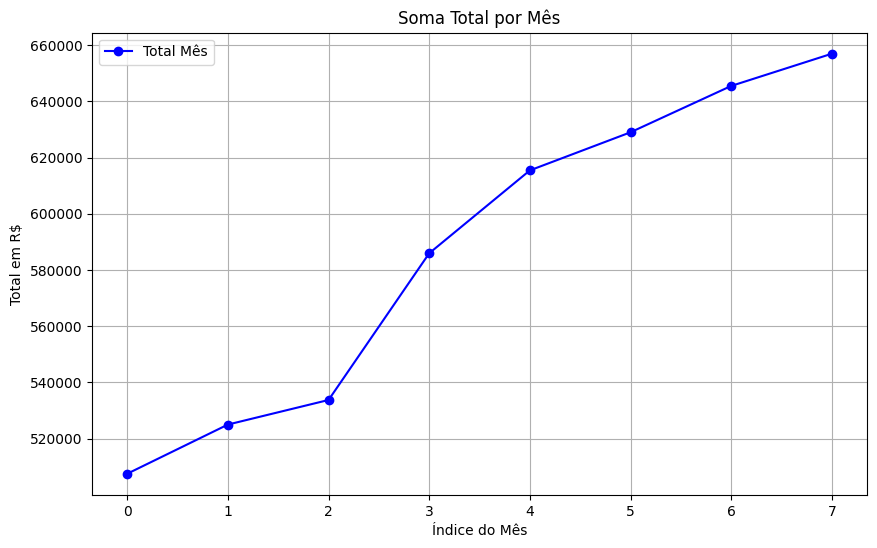

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar o arquivo CSV em um DataFrame
df = pd.read_csv("/content/Patrimonio.csv", sep=';')

# Converter as colunas 'mes' e 'ano' em inteiros, se necessário
df['mes'] = df['mes'].astype(int)
df['ano'] = df['ano'].astype(int)

# Selecionar as colunas de valores em reais para soma, exceto 'Salesforce aporte'
colunas_valores = ['Unisys', 'Salesforce', 'Fii Ações', 'caixa', 'Contas aporte', 'Redimento Teorico', 'Ações Salesforce']

# Garantir que as colunas de valores estão no formato numérico
df[colunas_valores] = df[colunas_valores].apply(pd.to_numeric, errors='coerce')

# Agrupar por ano e mês, somando os valores de todas as colunas
df_agrupado = df.groupby(['ano', 'mes'])[colunas_valores].sum().reset_index()

# Criar uma nova coluna para a soma total de todas as colunas de valor em cada mês
df_agrupado['total_mes'] = df_agrupado[colunas_valores].sum(axis=1)

# Ordenar pelo ano e mês (ordem crescente)
df_agrupado = df_agrupado.sort_values(by=['ano', 'mes'])

# Plotar o gráfico de linha para a coluna 'total_mes'
plt.figure(figsize=(10, 6))
plt.plot(df_agrupado['total_mes'], marker='o', linestyle='-', color='b', label='Total Mês')

# Adicionar títulos e rótulos
plt.title('Soma Total por Mês')
plt.xlabel('Índice do Mês')
plt.ylabel('Total em R$')
plt.legend()
plt.grid(True)

# Exibir o gráfico
plt.show()
